## Lab 6: Ussen Karlygash

# Implementing the Support Vector Machine (SVM) algorithm

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

file_path = "NHANES_age_prediction.csv"
data = pd.read_csv(file_path)

print(data.info())

# Assuming 'age_group' is your target variable
X = data.drop(["SEQN", "age_group"], axis=1)  
y = data["age_group"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


In [3]:
# Отображение распределения age_group
print(data['age_group'].value_counts())

age_group
Adult     1914
Senior     364
Name: count, dtype: int64


In [4]:
# Таргетты бинарлыкка ауыстыру
y_class = [1 if target == 'Adult' else 0 for target in y]

In [5]:
print(y_class[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [6]:
print(pd.Series(y_class).value_counts())

1    1914
0     364
Name: count, dtype: int64


In [7]:
# разделения данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.4, random_state=30)

In [8]:
svm_classifier = SVC()

In [9]:
# cross validation on smv_classifier
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96350365 0.97810219 0.94890511 0.98540146 0.97080292 0.96350365
 0.96323529 0.98529412 0.95588235 0.97058824]
Average Accuracy: 0.968521897810219


In [10]:
svm_params = svm_classifier.get_params()

print("SVM Parameters:")
for param, value in svm_params.items():
    print(f"{param}: {value}")

SVM Parameters:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


In [11]:
# Определить сетку параметров для поиска
param_grid = {
    'C': [0.1, 1, 10, 100],  # 
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel тип
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Коэффициент ядро
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [13]:

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best estimator on the test set
test_accuracy = best_estimator.score(X_test, y_test)
print("Test Accuracy with Best Estimator:", test_accuracy)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy with Best Estimator: 0.9967105263157895


In [14]:
# кросс валидация на лучшем оценке
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

# средний cross validation
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Accuracy: 1.0


In [15]:
# кросс валидация на лучшем оценке
cv_scores = cross_val_score(best_estimator, X_test, y_test, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

# средний cross validation
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.         1.         0.97802198 1.         1.         1.
 0.98901099 0.98901099 0.98901099 1.        ]
Average Accuracy: 0.9945054945054945


In [16]:
svm_classifier = SVC(kernel='linear', C=0.1, gamma= 'scale')

svm_classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [17]:
#Make predictions
y_pred = svm_classifier.predict(X_test)

In [18]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[158,   1],
       [  2, 751]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       1.00      1.00      1.00       753

    accuracy                           1.00       912
   macro avg       0.99      1.00      0.99       912
weighted avg       1.00      1.00      1.00       912



In [20]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 99.67%


In [21]:
# X = data[['RIDAGEYR', 'RIAGENDR']]
# y = data["age_group"]

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [24]:
svm_classifier_non_standardized = SVC(kernel='linear', C=0.1, gamma= 'scale')

# Train the classifier on non-standardized data
svm_classifier_non_standardized.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [25]:
y_pred = svm_classifier_non_standardized.predict(X_test)

In [26]:
# Create StandardScaler
scaler = StandardScaler()

# Standardize the training and testing data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [27]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[158,   1],
       [  2, 751]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       1.00      1.00      1.00       753

    accuracy                           1.00       912
   macro avg       0.99      1.00      0.99       912
weighted avg       1.00      1.00      1.00       912



In [29]:
# Create SVM classifier for standardized data
svm_classifier_standardized = SVC(kernel='linear', C=0.1, gamma= 'scale')

# Train the classifier on standardized data
svm_classifier_standardized.fit(X_train_standardized, y_train)

SVC(C=0.1, kernel='linear')

In [30]:
y_pred = svm_classifier_standardized.predict(X_test_standardized)

In [31]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[145,  14],
       [  0, 753]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       159
           1       0.98      1.00      0.99       753

    accuracy                           0.98       912
   macro avg       0.99      0.96      0.97       912
weighted avg       0.98      0.98      0.98       912



ValueError: X has 2 features, but SVC is expecting 8 features as input.

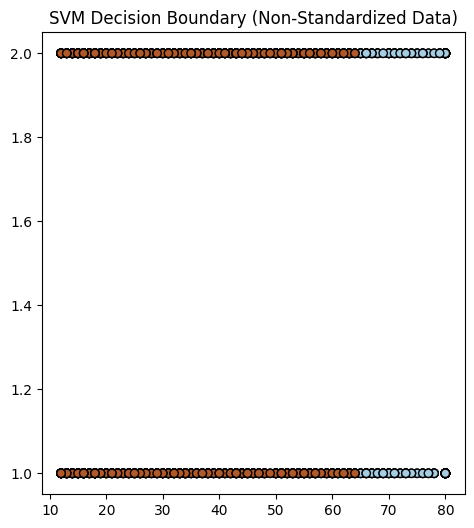

In [33]:

# --- Plot Decision Boundaries ---
# Plot non-standardized SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVM Decision Boundary (Non-Standardized Data)')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier_non_standardized.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ValueError: X has 2 features, but SVC is expecting 8 features as input.

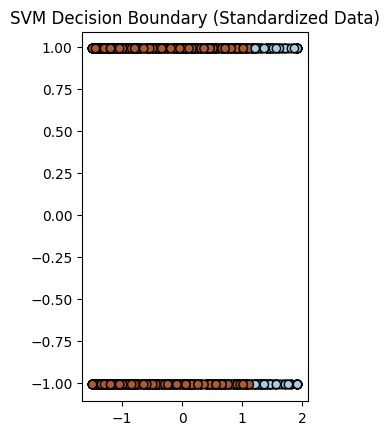

In [34]:
# Plot standardized SVM
plt.subplot(1, 2, 2)
plt.scatter(X_train_standardized[:, 0], X_train_standardized[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVM Decision Boundary (Standardized Data)')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier_standardized.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()